In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch

In [2]:
dataset_df = pd.read_csv('/content/preprocessed_data.csv')
dataset_df.info()
dataset_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       766 non-null    float64
 1   1       766 non-null    float64
 2   2       766 non-null    float64
 3   3       766 non-null    float64
 4   4       766 non-null    float64
 5   5       766 non-null    float64
 6   6       766 non-null    float64
 7   target  766 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 48.0 KB


,0,1,2,3,4,5,6,target
count,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02,7.660000e+02,766.000000
mean,9.276015e-17,5.588799e-16,2.933540e-16,1.298642e-16,-1.913178e-17,5.287328e-16,1.368212e-16,0.349869
std,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,1.000653e+00,0.477240
min,-1.142577e+00,-3.789538e+00,-3.569403e+00,-1.288765e+00,-6.950960e-01,-4.056585e+00,-1.190319e+00,0.000000
25%,-8.457789e-01,-6.866940e-01,-3.418051e-01,-1.288765e+00,-6.950960e-01,-5.956130e-01,-6.889769e-01,0.000000
50%,-2.521818e-01,-1.225405e-01,1.487897e-01,1.541762e-01,-3.826601e-01,2.320075e-04,-2.948497e-01,0.000000
75%,6.382139e-01,5.983223e-01,5.619222e-01,7.188053e-01,4.136173e-01,5.833995e-01,4.632033e-01,1.000000
max,3.902998e+00,2.447492e+00,2.730868e+00,4.922156e+00,6.647146e+00,4.450053e+00,5.882829e+00,1.000000


In [3]:
X = dataset_df.drop(columns='target')
y = dataset_df['target']

X_test_validate, X_test, y_test_validate, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_train_validate, y_train, y_train_validate = train_test_split(X_test_validate, y_test_validate, test_size=0.125, random_state=42, stratify=y_test_validate)
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_train_validate.shape, y_train_validate.shape)
print("Test set shape:", X_test.shape, y_test.shape)

X_test_validate_tensor = torch.tensor(X_test_validate.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_validate_tensor = torch.tensor(y_test_validate.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_train_validate_tensor = torch.tensor(X_train_validate.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_train_validate_tensor = torch.tensor(y_train_validate.values, dtype=torch.float32)
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_train_validate_tensor shape:", X_train_validate_tensor.shape)
print("y_train_validate_tensor shape:", y_train_validate_tensor.shape)
print("X_test_validate_tensor shape:", X_test_validate_tensor.shape)
print("y_test_validate_tensor shape:", y_test_validate_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

Training set shape: (602, 7) (602,)
Validation set shape: (87, 7) (87,)
Test set shape: (77, 7) (77,)
X_train_tensor shape: torch.Size([602, 7])
y_train_tensor shape: torch.Size([602])
X_train_validate_tensor shape: torch.Size([87, 7])
y_train_validate_tensor shape: torch.Size([87])
X_test_validate_tensor shape: torch.Size([689, 7])
y_test_validate_tensor shape: torch.Size([689])
X_test_tensor shape: torch.Size([77, 7])
y_test_tensor shape: torch.Size([77])


In [4]:
!pip install torchinfo

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_train_validate_tensor = X_train_validate_tensor.to(device)
y_train_validate_tensor = y_train_validate_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

Taking Optimizer as the Hyperparameter to tune.

Optimizer=ASGD

In [93]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_optimizer_asgd_1 = NeuralNetwork().to(device)
summary(model_optimizer_asgd_1, input_size=(32, 7))

learning_rate = 0.0001
epochs = 1000
batch_size = 10
loss_function = nn.BCELoss()
optimizer = optim.ASGD(model_optimizer_asgd_1.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_optimizer_asgd_1=[]
val_loss_list_optimizer_asgd_1=[]
train_accuracy_list_optimizer_asgd_1=[]
val_accuracy_list_optimizer_asgd_1=[]
test_accuracy_list_optimizer_asgd_1=[]

start_time = time.time()
for epoch in range(epochs):
    model_optimizer_asgd_1.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_optimizer_asgd_1(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_optimizer_asgd_1.append(train_accuracy)
    train_loss_list_optimizer_asgd_1.append(train_loss)

    model_optimizer_asgd_1.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_optimizer_asgd_1(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_optimizer_asgd_1.append(val_accuracy)
    val_loss_list_optimizer_asgd_1.append(val_loss)

    test_predictions_optimizer_asgd_1 = model_optimizer_asgd_1(X_test_tensor).view(-1)
    test_predictions_rounded_optimizer_asgd_1 = torch.round(test_predictions_optimizer_asgd_1)
    test_predictions_rounded_numpy_optimizer_asgd_1 = test_predictions_rounded_optimizer_asgd_1.cpu().detach().numpy()
    y_test_numpy = y_test_tensor.cpu().numpy()
    accuracy_optimizer_asgd_1 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_optimizer_asgd_1)
    test_accuracy_list_optimizer_asgd_1.append(accuracy_optimizer_asgd_1)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

Epoch 1/1000, Training Loss: 41.80739, Validation Loss: 6.17083
Epoch 2/1000, Training Loss: 41.78589, Validation Loss: 6.16714
Epoch 3/1000, Training Loss: 41.76453, Validation Loss: 6.16347
Epoch 4/1000, Training Loss: 41.74330, Validation Loss: 6.15982
Epoch 5/1000, Training Loss: 41.72220, Validation Loss: 6.15620
Epoch 6/1000, Training Loss: 41.70124, Validation Loss: 6.15259
Epoch 7/1000, Training Loss: 41.68040, Validation Loss: 6.14901
Epoch 8/1000, Training Loss: 41.65969, Validation Loss: 6.14546
Epoch 9/1000, Training Loss: 41.63911, Validation Loss: 6.14192
Epoch 10/1000, Training Loss: 41.61865, Validation Loss: 6.13840
Epoch 11/1000, Training Loss: 41.59833, Validation Loss: 6.13490
Epoch 12/1000, Training Loss: 41.57813, Validation Loss: 6.13142
Epoch 13/1000, Training Loss: 41.55804, Validation Loss: 6.12797
Epoch 14/1000, Training Loss: 41.53806, Validation Loss: 6.12453
Epoch 15/1000, Training Loss: 41.51820, Validation Loss: 6.12110
Epoch 16/1000, Training Loss: 41.4

In [94]:
from sklearn.metrics import accuracy_score

model_optimizer_asgd_1.eval()
test_predictions_optimizer_asgd_1 = model_optimizer_asgd_1(X_test_tensor).view(-1)
test_predictions_rounded_optimizer_asgd_1 = torch.round(test_predictions_optimizer_asgd_1)

test_predictions_rounded_numpy_optimizer_asgd_1 = test_predictions_rounded_optimizer_asgd_1.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_optimizer_asgd_1 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_optimizer_asgd_1)

print(f"Accuracy for variable optimizer with opmizer as asgd: {accuracy_optimizer_asgd_1:.4f}")

Accuracy for variable optimizer with opmizer as asgd: 0.7662


In [45]:
model_optimizer_asgd_1.eval()
test_loss_optimizer_asgd_1=0
with torch.no_grad():
    test_outputs_optimizer_asgd_1 = model_optimizer_asgd_1(X_test_tensor)
    test_loss_optimizer_asgd_1 = loss_function(test_outputs_optimizer_asgd_1, y_test_tensor.view(-1, 1))

print(f"Test Loss for variable opmizer with opmizer as asgd: {test_loss_optimizer_asgd_1.item():.5f}")


Test Loss for variable opmizer with opmizer as asgd: 0.50613


Optimizer=Adagrad

In [10]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_optimizer_adagrad_2 = NeuralNetwork().to(device)
summary(model_optimizer_adagrad_2, input_size=(32, 7))

learning_rate = 0.0001
epochs = 1000
batch_size = 10
loss_function = nn.BCELoss()
optimizer = optim.Adagrad(model_optimizer_adagrad_2.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_optimizer_adagrad_2=[]
val_loss_list_optimizer_adagrad_2=[]
train_accuracy_list_optimizer_adagrad_2=[]
val_accuracy_list_optimizer_adagrad_2=[]

start_time = time.time()
for epoch in range(epochs):
    model_optimizer_adagrad_2.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_optimizer_adagrad_2(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_optimizer_adagrad_2.append(train_accuracy)
    train_loss_list_optimizer_adagrad_2.append(train_loss)

    model_optimizer_adagrad_2.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_optimizer_adagrad_2(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_optimizer_adagrad_2.append(val_accuracy)
    val_accuracy_list_optimizer_adagrad_2.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

Epoch 1/1000, Training Loss: 41.84822, Validation Loss: 6.10785
Epoch 2/1000, Training Loss: 41.68792, Validation Loss: 6.08813
Epoch 3/1000, Training Loss: 41.58735, Validation Loss: 6.07315
Epoch 4/1000, Training Loss: 41.50728, Validation Loss: 6.06063
Epoch 5/1000, Training Loss: 41.43890, Validation Loss: 6.04966
Epoch 6/1000, Training Loss: 41.37846, Validation Loss: 6.03981
Epoch 7/1000, Training Loss: 41.32366, Validation Loss: 6.03082
Epoch 8/1000, Training Loss: 41.27325, Validation Loss: 6.02249
Epoch 9/1000, Training Loss: 41.22644, Validation Loss: 6.01472
Epoch 10/1000, Training Loss: 41.18253, Validation Loss: 6.00740
Epoch 11/1000, Training Loss: 41.14111, Validation Loss: 6.00048
Epoch 12/1000, Training Loss: 41.10188, Validation Loss: 5.99389
Epoch 13/1000, Training Loss: 41.06451, Validation Loss: 5.98758
Epoch 14/1000, Training Loss: 41.02875, Validation Loss: 5.98154
Epoch 15/1000, Training Loss: 40.99439, Validation Loss: 5.97571
Epoch 16/1000, Training Loss: 40.9

In [11]:
from sklearn.metrics import accuracy_score

model_optimizer_adagrad_2.eval()
test_predictions_optimizer_adagrad_2 = model_optimizer_adagrad_2(X_test_tensor).view(-1)
test_predictions_rounded_optimizer_adagrad_2 = torch.round(test_predictions_optimizer_adagrad_2)

test_predictions_rounded_numpy_optimizer_adagrad_2 = test_predictions_rounded_optimizer_adagrad_2.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_optimizer_adagrad_2 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_optimizer_adagrad_2)

print(f"Accuracy for variable optimizer with opmizer as Adagrad: {accuracy_optimizer_adagrad_2:.4f}")

Accuracy for variable optimizer with opmizer as Adagrad: 0.7662


In [12]:
model_optimizer_adagrad_2.eval()
test_loss_optimizer_adagrad_2=0
with torch.no_grad():
    test_outputs_optimizer_adagrad_2 = model_optimizer_adagrad_2(X_test_tensor)
    test_loss_optimizer_adagrad_2 = loss_function(test_outputs_optimizer_adagrad_2, y_test_tensor.view(-1, 1))

print(f"Test Loss for variable opmizer with opmizer as Adagrad: {test_loss_optimizer_adagrad_2.item():.5f}")


Test Loss for variable opmizer with opmizer as Adagrad: 0.56077


Optimizer=Adadelta

In [13]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_optimizer_adadelta_3 = NeuralNetwork().to(device)
summary(model_optimizer_adadelta_3, input_size=(32, 7))

learning_rate = 0.0001
epochs = 1000
batch_size = 10
loss_function = nn.BCELoss()
optimizer = optim.Adadelta(model_optimizer_adadelta_3.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_optimizer_adadelta_3=[]
val_loss_list_optimizer_adadelta_3=[]
train_accuracy_list_optimizer_adadelta_3=[]
val_accuracy_list_optimizer_adadelta_3=[]

start_time = time.time()
for epoch in range(epochs):
    model_optimizer_adadelta_3.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_optimizer_adadelta_3(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_optimizer_adadelta_3.append(train_accuracy)
    train_loss_list_optimizer_adadelta_3.append(train_loss)

    model_optimizer_adadelta_3.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_optimizer_adadelta_3(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_optimizer_adadelta_3.append(val_accuracy)
    val_accuracy_list_optimizer_adadelta_3.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

Epoch 1/1000, Training Loss: 40.37758, Validation Loss: 5.89584
Epoch 2/1000, Training Loss: 40.37474, Validation Loss: 5.89532
Epoch 3/1000, Training Loss: 40.37196, Validation Loss: 5.89481
Epoch 4/1000, Training Loss: 40.36921, Validation Loss: 5.89430
Epoch 5/1000, Training Loss: 40.36647, Validation Loss: 5.89380
Epoch 6/1000, Training Loss: 40.36373, Validation Loss: 5.89329
Epoch 7/1000, Training Loss: 40.36100, Validation Loss: 5.89279
Epoch 8/1000, Training Loss: 40.35827, Validation Loss: 5.89228
Epoch 9/1000, Training Loss: 40.35554, Validation Loss: 5.89178
Epoch 10/1000, Training Loss: 40.35282, Validation Loss: 5.89128
Epoch 11/1000, Training Loss: 40.35009, Validation Loss: 5.89078
Epoch 12/1000, Training Loss: 40.34736, Validation Loss: 5.89027
Epoch 13/1000, Training Loss: 40.34464, Validation Loss: 5.88977
Epoch 14/1000, Training Loss: 40.34192, Validation Loss: 5.88927
Epoch 15/1000, Training Loss: 40.33920, Validation Loss: 5.88877
Epoch 16/1000, Training Loss: 40.3

In [14]:
from sklearn.metrics import accuracy_score

model_optimizer_adadelta_3.eval()
test_predictions_optimizer_adadelta_3 = model_optimizer_adadelta_3(X_test_tensor).view(-1)
test_predictions_rounded_optimizer_adadelta_3 = torch.round(test_predictions_optimizer_adadelta_3)

test_predictions_rounded_numpy_optimizer_adadelta_3 = test_predictions_rounded_optimizer_adadelta_3.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_optimizer_adadelta_3 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_optimizer_adadelta_3)

print(f"Accuracy for variable optimizer with opmizer as Adadelta: {accuracy_optimizer_adadelta_3:.4f}")

Accuracy for variable optimizer with opmizer as Adadelta: 0.6494


In [15]:
model_optimizer_adadelta_3.eval()
test_loss_optimizer_adadelta_3=0
with torch.no_grad():
    test_outputs_optimizer_adadelta_3 = model_optimizer_adadelta_3(X_test_tensor)
    test_loss_optimizer_adadelta_3 = loss_function(test_outputs_optimizer_adadelta_3, y_test_tensor.view(-1, 1))

print(f"Test Loss for variable opmizer with opmizer as Adadelta: {test_loss_optimizer_adadelta_3.item():.5f}")


Test Loss for variable opmizer with opmizer as Adadelta: 0.62053


Taking Batch Size as the Hyperparameter to tune.

Batch Size = 15

In [16]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_batch_15_1 = NeuralNetwork().to(device)
summary(model_batch_15_1, input_size=(32, 7))

learning_rate = 0.0001
epochs = 1000
batch_size = 15
loss_function = nn.BCELoss()
optimizer = optim.SGD(model_batch_15_1.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_batch_15_1=[]
val_loss_list_batch_15_1=[]
train_accuracy_list_batch_15_1=[]
val_accuracy_list_batch_15_1=[]

start_time = time.time()
for epoch in range(epochs):
    model_batch_15_1.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_batch_15_1(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_batch_15_1.append(train_accuracy)
    train_loss_list_batch_15_1.append(train_loss)

    model_batch_15_1.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_batch_15_1(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_batch_15_1.append(val_accuracy)
    val_accuracy_list_batch_15_1.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

Epoch 1/1000, Training Loss: 27.67620, Validation Loss: 4.07605
Epoch 2/1000, Training Loss: 27.66783, Validation Loss: 4.07473
Epoch 3/1000, Training Loss: 27.65949, Validation Loss: 4.07341
Epoch 4/1000, Training Loss: 27.65117, Validation Loss: 4.07209
Epoch 5/1000, Training Loss: 27.64288, Validation Loss: 4.07078
Epoch 6/1000, Training Loss: 27.63461, Validation Loss: 4.06947
Epoch 7/1000, Training Loss: 27.62638, Validation Loss: 4.06817
Epoch 8/1000, Training Loss: 27.61817, Validation Loss: 4.06687
Epoch 9/1000, Training Loss: 27.60999, Validation Loss: 4.06557
Epoch 10/1000, Training Loss: 27.60183, Validation Loss: 4.06428
Epoch 11/1000, Training Loss: 27.59369, Validation Loss: 4.06299
Epoch 12/1000, Training Loss: 27.58558, Validation Loss: 4.06170
Epoch 13/1000, Training Loss: 27.57750, Validation Loss: 4.06042
Epoch 14/1000, Training Loss: 27.56944, Validation Loss: 4.05914
Epoch 15/1000, Training Loss: 27.56141, Validation Loss: 4.05786
Epoch 16/1000, Training Loss: 27.5

In [17]:
from sklearn.metrics import accuracy_score

model_batch_15_1.eval()
test_predictions_batch_15_1 = model_batch_15_1(X_test_tensor).view(-1)
test_predictions_rounded_batch_15_1 = torch.round(test_predictions_batch_15_1)

test_predictions_rounded_numpy_batch_15_1 = test_predictions_rounded_batch_15_1.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_batch_15_1 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_batch_15_1)

print(f"Accuracy for variable batch size with batch size as 15: {accuracy_batch_15_1:.4f}")

Accuracy for variable batch size with batch size as 15: 0.7143


In [18]:
model_batch_15_1.eval()
test_loss_batch_15_1=0
with torch.no_grad():
    test_outputs_batch_15_1 = model_batch_15_1(X_test_tensor)
    test_loss_batch_15_1 = loss_function(test_outputs_batch_15_1, y_test_tensor.view(-1, 1))

print(f"Test Loss for variable batch size with batch size as 15: {test_loss_batch_15_1.item():.5f}")


Test Loss for variable batch size with batch size as 15: 0.55935


Batch Size = 20

In [19]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_batch_20_2 = NeuralNetwork().to(device)
summary(model_batch_20_2, input_size=(32, 7))

learning_rate = 0.0001
epochs = 1000
batch_size = 20
loss_function = nn.BCELoss()
optimizer = optim.SGD(model_batch_20_2.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_batch_20_2=[]
val_loss_list_batch_20_2=[]
train_accuracy_list_batch_20_2=[]
val_accuracy_list_batch_20_2=[]

start_time = time.time()
for epoch in range(epochs):
    model_batch_20_2.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_batch_20_2(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_batch_20_2.append(train_accuracy)
    train_loss_list_batch_20_2.append(train_loss)

    model_batch_20_2.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_batch_20_2(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_batch_20_2.append(val_accuracy)
    val_accuracy_list_batch_20_2.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

Epoch 1/1000, Training Loss: 22.49111, Validation Loss: 3.68470
Epoch 2/1000, Training Loss: 22.48345, Validation Loss: 3.68326
Epoch 3/1000, Training Loss: 22.47583, Validation Loss: 3.68182
Epoch 4/1000, Training Loss: 22.46822, Validation Loss: 3.68039
Epoch 5/1000, Training Loss: 22.46064, Validation Loss: 3.67896
Epoch 6/1000, Training Loss: 22.45309, Validation Loss: 3.67754
Epoch 7/1000, Training Loss: 22.44556, Validation Loss: 3.67612
Epoch 8/1000, Training Loss: 22.43805, Validation Loss: 3.67471
Epoch 9/1000, Training Loss: 22.43056, Validation Loss: 3.67330
Epoch 10/1000, Training Loss: 22.42310, Validation Loss: 3.67189
Epoch 11/1000, Training Loss: 22.41566, Validation Loss: 3.67049
Epoch 12/1000, Training Loss: 22.40825, Validation Loss: 3.66909
Epoch 13/1000, Training Loss: 22.40086, Validation Loss: 3.66770
Epoch 14/1000, Training Loss: 22.39350, Validation Loss: 3.66631
Epoch 15/1000, Training Loss: 22.38617, Validation Loss: 3.66493
Epoch 16/1000, Training Loss: 22.3

In [20]:
from sklearn.metrics import accuracy_score

model_batch_20_2.eval()
test_predictions_batch_20_2 = model_batch_20_2(X_test_tensor).view(-1)
test_predictions_rounded_batch_20_2 = torch.round(test_predictions_batch_20_2)

test_predictions_rounded_numpy_batch_20_2 = test_predictions_rounded_batch_20_2.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_batch_20_2 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_batch_20_2)

print(f"Accuracy for variable batch size with batch size as 20: {accuracy_batch_20_2:.4f}")

Accuracy for variable batch size with batch size as 20: 0.6753


In [21]:
model_batch_20_2.eval()
test_loss_batch_20_2=0
with torch.no_grad():
    test_outputs_batch_20_2 = model_batch_20_2(X_test_tensor)
    test_loss_batch_20_2 = loss_function(test_outputs_batch_20_2, y_test_tensor.view(-1, 1))

print(f"Test Loss for variable batch size with batch size as 20: {test_loss_batch_20_2.item():.5f}")


Test Loss for variable batch size with batch size as 20: 0.60650


Batch Size = 30

In [22]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_batch_30_3 = NeuralNetwork().to(device)
summary(model_batch_30_3, input_size=(32, 7))

learning_rate = 0.0001
epochs = 1000
batch_size = 30
loss_function = nn.BCELoss()
optimizer = optim.SGD(model_batch_30_3.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_batch_30_3=[]
val_loss_list_batch_30_3=[]
train_accuracy_list_batch_30_3=[]
val_accuracy_list_batch_30_3=[]

start_time = time.time()
for epoch in range(epochs):
    model_batch_30_3.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_batch_30_3(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_batch_30_3.append(train_accuracy)
    train_loss_list_batch_30_3.append(train_loss)

    model_batch_30_3.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_batch_30_3(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_batch_30_3.append(val_accuracy)
    val_accuracy_list_batch_30_3.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

Epoch 1/1000, Training Loss: 14.90600, Validation Loss: 2.16497
Epoch 2/1000, Training Loss: 14.90145, Validation Loss: 2.16425
Epoch 3/1000, Training Loss: 14.89691, Validation Loss: 2.16353
Epoch 4/1000, Training Loss: 14.89238, Validation Loss: 2.16281
Epoch 5/1000, Training Loss: 14.88787, Validation Loss: 2.16210
Epoch 6/1000, Training Loss: 14.88336, Validation Loss: 2.16138
Epoch 7/1000, Training Loss: 14.87887, Validation Loss: 2.16067
Epoch 8/1000, Training Loss: 14.87440, Validation Loss: 2.15996
Epoch 9/1000, Training Loss: 14.86993, Validation Loss: 2.15926
Epoch 10/1000, Training Loss: 14.86548, Validation Loss: 2.15855
Epoch 11/1000, Training Loss: 14.86104, Validation Loss: 2.15785
Epoch 12/1000, Training Loss: 14.85661, Validation Loss: 2.15715
Epoch 13/1000, Training Loss: 14.85220, Validation Loss: 2.15645
Epoch 14/1000, Training Loss: 14.84779, Validation Loss: 2.15575
Epoch 15/1000, Training Loss: 14.84340, Validation Loss: 2.15505
Epoch 16/1000, Training Loss: 14.8

In [23]:
from sklearn.metrics import accuracy_score

model_batch_30_3.eval()
test_predictions_batch_30_3 = model_batch_30_3(X_test_tensor).view(-1)
test_predictions_rounded_batch_30_3 = torch.round(test_predictions_batch_30_3)

test_predictions_rounded_numpy_batch_30_3 = test_predictions_rounded_batch_30_3.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_batch_30_3 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_batch_30_3)

print(f"Accuracy for variable batch size with batch size as 30: {accuracy_batch_30_3:.4f}")

Accuracy for variable batch size with batch size as 30: 0.6494


In [24]:
model_batch_30_3.eval()
test_loss_batch_30_3=0
with torch.no_grad():
    test_outputs_batch_30_3 = model_batch_30_3(X_test_tensor)
    test_loss_batch_30_3 = loss_function(test_outputs_batch_30_3, y_test_tensor.view(-1, 1))

print(f"Test Loss for variable batch size with batch size as 30: {test_loss_batch_30_3.item():.5f}")


Test Loss for variable batch size with batch size as 30: 0.59580


Taking Epochs as the Hyperparameter to tune.

Epochs = 1200

In [25]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_epoch_1200_1 = NeuralNetwork().to(device)
summary(model_epoch_1200_1, input_size=(32, 7))

learning_rate = 0.0001
epochs = 1200
batch_size = 10
loss_function = nn.BCELoss()
optimizer = optim.SGD(model_epoch_1200_1.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_epoch_1200_1=[]
val_loss_list_epoch_1200_1=[]
train_accuracy_list_epoch_1200_1=[]
val_accuracy_list_epoch_1200_1=[]

start_time = time.time()
for epoch in range(epochs):
    model_epoch_1200_1.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_epoch_1200_1(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_epoch_1200_1.append(train_accuracy)
    train_loss_list_epoch_1200_1.append(train_loss)

    model_epoch_1200_1.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_epoch_1200_1(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_epoch_1200_1.append(val_accuracy)
    val_accuracy_list_epoch_1200_1.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

Epoch 1/1200, Training Loss: 42.75400, Validation Loss: 6.28222
Epoch 2/1200, Training Loss: 42.72883, Validation Loss: 6.27796
Epoch 3/1200, Training Loss: 42.70382, Validation Loss: 6.27371
Epoch 4/1200, Training Loss: 42.67898, Validation Loss: 6.26950
Epoch 5/1200, Training Loss: 42.65431, Validation Loss: 6.26531
Epoch 6/1200, Training Loss: 42.62980, Validation Loss: 6.26115
Epoch 7/1200, Training Loss: 42.60544, Validation Loss: 6.25701
Epoch 8/1200, Training Loss: 42.58123, Validation Loss: 6.25290
Epoch 9/1200, Training Loss: 42.55717, Validation Loss: 6.24881
Epoch 10/1200, Training Loss: 42.53326, Validation Loss: 6.24474
Epoch 11/1200, Training Loss: 42.50949, Validation Loss: 6.24069
Epoch 12/1200, Training Loss: 42.48585, Validation Loss: 6.23666
Epoch 13/1200, Training Loss: 42.46234, Validation Loss: 6.23265
Epoch 14/1200, Training Loss: 42.43896, Validation Loss: 6.22866
Epoch 15/1200, Training Loss: 42.41571, Validation Loss: 6.22469
Epoch 16/1200, Training Loss: 42.3

In [26]:
from sklearn.metrics import accuracy_score

model_epoch_1200_1.eval()
test_predictions_epoch_1200_1 = model_epoch_1200_1(X_test_tensor).view(-1)
test_predictions_rounded_epoch_1200_1 = torch.round(test_predictions_epoch_1200_1)

test_predictions_rounded_numpy_epoch_1200_1 = test_predictions_rounded_epoch_1200_1.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_epoch_1200_1 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_epoch_1200_1)

print(f"Accuracy for variable epoch size with epoch size as 1200: {accuracy_epoch_1200_1:.4f}")

Accuracy for variable epoch size with epoch size as 1200: 0.7403


In [27]:
model_epoch_1200_1.eval()
test_loss_epoch_1200_1=0
with torch.no_grad():
    test_outputs_epoch_1200_1 = model_epoch_1200_1(X_test_tensor)
    test_loss_epoch_1200_1 = loss_function(test_outputs_epoch_1200_1, y_test_tensor.view(-1, 1))

print(f"Test Loss for variable epoch size with epoch size as 1200: {test_loss_epoch_1200_1.item():.5f}")


Test Loss for variable epoch size with epoch size as 1200: 0.53790


Epochs = 2000

In [28]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_epoch_2000_2 = NeuralNetwork().to(device)
summary(model_epoch_2000_2, input_size=(32, 7))

learning_rate = 0.0001
epochs = 2000
batch_size = 10
loss_function = nn.BCELoss()
optimizer = optim.SGD(model_epoch_2000_2.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_epoch_2000_2=[]
val_loss_list_epoch_2000_2=[]
train_accuracy_list_epoch_2000_2=[]
val_accuracy_list_epoch_2000_2=[]

start_time = time.time()
for epoch in range(epochs):
    model_epoch_2000_2.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_epoch_2000_2(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_epoch_2000_2.append(train_accuracy)
    train_loss_list_epoch_2000_2.append(train_loss)

    model_epoch_2000_2.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_epoch_2000_2(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_epoch_2000_2.append(val_accuracy)
    val_accuracy_list_epoch_2000_2.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

Epoch 1/2000, Training Loss: 41.17896, Validation Loss: 6.03281
Epoch 2/2000, Training Loss: 41.16479, Validation Loss: 6.03030
Epoch 3/2000, Training Loss: 41.15070, Validation Loss: 6.02781
Epoch 4/2000, Training Loss: 41.13667, Validation Loss: 6.02532
Epoch 5/2000, Training Loss: 41.12269, Validation Loss: 6.02284
Epoch 6/2000, Training Loss: 41.10876, Validation Loss: 6.02036
Epoch 7/2000, Training Loss: 41.09489, Validation Loss: 6.01790
Epoch 8/2000, Training Loss: 41.08109, Validation Loss: 6.01545
Epoch 9/2000, Training Loss: 41.06735, Validation Loss: 6.01301
Epoch 10/2000, Training Loss: 41.05367, Validation Loss: 6.01057
Epoch 11/2000, Training Loss: 41.04005, Validation Loss: 6.00815
Epoch 12/2000, Training Loss: 41.02649, Validation Loss: 6.00573
Epoch 13/2000, Training Loss: 41.01300, Validation Loss: 6.00333
Epoch 14/2000, Training Loss: 40.99955, Validation Loss: 6.00094
Epoch 15/2000, Training Loss: 40.98615, Validation Loss: 5.99855
Epoch 16/2000, Training Loss: 40.9

In [29]:
from sklearn.metrics import accuracy_score

model_epoch_2000_2.eval()
test_predictions_epoch_2000_2 = model_epoch_2000_2(X_test_tensor).view(-1)
test_predictions_rounded_epoch_2000_2 = torch.round(test_predictions_epoch_2000_2)

test_predictions_rounded_numpy_epoch_2000_2 = test_predictions_rounded_epoch_2000_2.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_epoch_2000_2 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_epoch_2000_2)

print(f"Accuracy for variable epoch size with epoch size as 2000: {accuracy_epoch_2000_2:.4f}")

Accuracy for variable epoch size with epoch size as 2000: 0.7532


In [32]:
model_epoch_2000_2.eval()
test_loss_epoch_2000_2=0
with torch.no_grad():
    test_outputs_epoch_2000_2 = model_epoch_2000_2(X_test_tensor)
    test_loss_epoch_2000_2 = loss_function(test_outputs_epoch_2000_2, y_test_tensor.view(-1, 1))

print(f"Test Loss for variable epoch size with epoch size as 2000: {test_loss_epoch_2000_2.item():.5f}")


Test Loss for variable epoch size with epoch size as 2000: 0.49276


Epochs = 3000

In [33]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_epoch_3000_3 = NeuralNetwork().to(device)
summary(model_epoch_3000_3, input_size=(32, 7))

learning_rate = 0.0001
epochs = 3000
batch_size = 10
loss_function = nn.BCELoss()
optimizer = optim.SGD(model_epoch_3000_3.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_epoch_3000_3=[]
val_loss_list_epoch_3000_3=[]
train_accuracy_list_epoch_3000_3=[]
val_accuracy_list_epoch_3000_3=[]

start_time = time.time()
for epoch in range(epochs):
    model_epoch_3000_3.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_epoch_3000_3(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_epoch_3000_3.append(train_accuracy)
    train_loss_list_epoch_3000_3.append(train_loss)

    model_epoch_3000_3.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_epoch_3000_3(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_epoch_3000_3.append(val_accuracy)
    val_accuracy_list_epoch_3000_3.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

Epoch 1/3000, Training Loss: 41.39382, Validation Loss: 6.15777
Epoch 2/3000, Training Loss: 41.37753, Validation Loss: 6.15524
Epoch 3/3000, Training Loss: 41.36133, Validation Loss: 6.15273
Epoch 4/3000, Training Loss: 41.34522, Validation Loss: 6.15023
Epoch 5/3000, Training Loss: 41.32920, Validation Loss: 6.14774
Epoch 6/3000, Training Loss: 41.31326, Validation Loss: 6.14526
Epoch 7/3000, Training Loss: 41.29740, Validation Loss: 6.14280
Epoch 8/3000, Training Loss: 41.28163, Validation Loss: 6.14035
Epoch 9/3000, Training Loss: 41.26593, Validation Loss: 6.13791
Epoch 10/3000, Training Loss: 41.25032, Validation Loss: 6.13549
Epoch 11/3000, Training Loss: 41.23479, Validation Loss: 6.13307
Epoch 12/3000, Training Loss: 41.21933, Validation Loss: 6.13067
Epoch 13/3000, Training Loss: 41.20397, Validation Loss: 6.12828
Epoch 14/3000, Training Loss: 41.18868, Validation Loss: 6.12591
Epoch 15/3000, Training Loss: 41.17347, Validation Loss: 6.12354
Epoch 16/3000, Training Loss: 41.1

In [34]:
from sklearn.metrics import accuracy_score

model_epoch_3000_3.eval()
test_predictions_epoch_3000_3 = model_epoch_3000_3(X_test_tensor).view(-1)
test_predictions_rounded_epoch_3000_3 = torch.round(test_predictions_epoch_3000_3)

test_predictions_rounded_numpy_epoch_3000_3 = test_predictions_rounded_epoch_3000_3.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_epoch_3000_3 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_epoch_3000_3)

print(f"Accuracy for variable epoch size with epoch size as 3000: {accuracy_epoch_3000_3:.4f}")

Accuracy for variable epoch size with epoch size as 3000: 0.7532


In [36]:
model_epoch_3000_3.eval()
test_loss_epoch_3000_3=0
with torch.no_grad():
    test_outputs_epoch_3000_3 = model_epoch_3000_3(X_test_tensor)
    test_loss_epoch_3000_3 = loss_function(test_outputs_epoch_3000_3, y_test_tensor.view(-1, 1))

print(f"Test Loss for variable epoch size with epoch size as 3000: {test_loss_epoch_3000_3.item():.5f}")


Test Loss for variable epoch size with epoch size as 3000: 0.47348


References:
https://pytorch.org/docs/stable/generated/torch.optim.Adagrad.html
https://pytorch.org/docs/stable/generated/torch.optim.Adadelta.html
https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ReduceLROnPlateau.html#torch.optim.lr_scheduler.ReduceLROnPlateau


Optimizing the base model trying four different approaches

Adding dropouts in the base model

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

class BaseModelWithDropouts(nn.Module):
    def __init__(self):
        super(BaseModelWithDropouts, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [96]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_with_dropouts_base_1 = BaseModelWithDropouts().to(device)
summary(model_with_dropouts_base_1, input_size=(32, 7))

learning_rate = 0.0001
epochs = 1000
batch_size = 10
loss_function = nn.BCELoss()
optimizer = optim.ASGD(model_with_dropouts_base_1.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_with_dropouts_base_1=[]
val_loss_list_with_dropouts_base_1=[]
train_accuracy_list_with_dropouts_base_1=[]
val_accuracy_list_with_dropouts_base_1=[]
test_accuracy_list_with_dropouts_base_1=[]


start_time = time.time()
for epoch in range(epochs):
    model_with_dropouts_base_1.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_with_dropouts_base_1(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_with_dropouts_base_1.append(train_accuracy)
    train_loss_list_with_dropouts_base_1.append(train_loss)

    model_with_dropouts_base_1.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_with_dropouts_base_1(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_with_dropouts_base_1.append(val_accuracy)
    val_loss_list_with_dropouts_base_1.append(val_loss)

    test_predictions_with_dropouts_base_1 = model_with_dropouts_base_1(X_test_tensor).view(-1)
    test_predictions_rounded_with_dropouts_base_1 = torch.round(test_predictions_with_dropouts_base_1)
    test_predictions_rounded_numpy_with_dropouts_base_1 = test_predictions_rounded_with_dropouts_base_1.cpu().detach().numpy()
    y_test_numpy = y_test_tensor.cpu().numpy()
    accuracy_dropouts_base_1 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_with_dropouts_base_1)
    test_accuracy_list_with_dropouts_base_1.append(accuracy_dropouts_base_1)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

Epoch 1/1000, Training Loss: 41.31572, Validation Loss: 6.05197
Epoch 2/1000, Training Loss: 41.27688, Validation Loss: 6.04968
Epoch 3/1000, Training Loss: 41.00581, Validation Loss: 6.04742
Epoch 4/1000, Training Loss: 41.17298, Validation Loss: 6.04527
Epoch 5/1000, Training Loss: 41.15601, Validation Loss: 6.04292
Epoch 6/1000, Training Loss: 41.30719, Validation Loss: 6.04066
Epoch 7/1000, Training Loss: 41.13238, Validation Loss: 6.03862
Epoch 8/1000, Training Loss: 41.06537, Validation Loss: 6.03640
Epoch 9/1000, Training Loss: 41.22566, Validation Loss: 6.03423
Epoch 10/1000, Training Loss: 41.27486, Validation Loss: 6.03209
Epoch 11/1000, Training Loss: 41.11401, Validation Loss: 6.02993
Epoch 12/1000, Training Loss: 41.18369, Validation Loss: 6.02779
Epoch 13/1000, Training Loss: 41.13097, Validation Loss: 6.02568
Epoch 14/1000, Training Loss: 41.01951, Validation Loss: 6.02350
Epoch 15/1000, Training Loss: 41.04592, Validation Loss: 6.02131
Epoch 16/1000, Training Loss: 41.2

In [97]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_with_dropouts_base_1.eval()
test_predictions_with_dropouts_base_1 = model_with_dropouts_base_1(X_test_tensor).view(-1)
test_predictions_rounded_with_dropouts_base_1 = torch.round(test_predictions_with_dropouts_base_1)

test_predictions_rounded_numpy_with_dropouts_base_1 = test_predictions_rounded_with_dropouts_base_1.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_dropouts_base_1 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_with_dropouts_base_1)
precision_dropouts_base_1, recall_dropouts_base_1, f1_dropouts_base_1, _ = precision_recall_fscore_support(y_test_numpy, test_predictions_rounded_numpy_with_dropouts_base_1, average='binary')

print(f"Best Model Accuracy: {accuracy_dropouts_base_1:.4f}, Precision: {precision_dropouts_base_1:.4f}, Recall: {recall_dropouts_base_1:.4f}, F1 Score: {f1_dropouts_base_1:.4f}")


Best Model Accuracy: 0.7792, Precision: 0.7500, Recall: 0.5556, F1 Score: 0.6383


In [98]:
model_with_dropouts_base_1.eval()
test_loss=0
with torch.no_grad():
    test_outputs_dropouts_base_1 = model_with_dropouts_base_1(X_test_tensor)
    test_loss_dropouts_base_1 = loss_function(test_outputs_dropouts_base_1, y_test_tensor.view(-1, 1))

print(f"Best Model Test Loss: {test_loss_dropouts_base_1.item():.5f}")


Best Model Test Loss: 0.53143


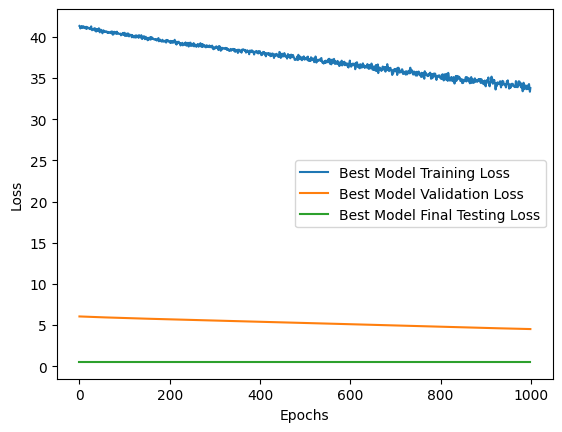

In [99]:
import matplotlib.pyplot as plt

epochs_range = range(epochs)

plt.plot(epochs_range, train_loss_list_with_dropouts_base_1, label='Best Model Training Loss')
plt.plot(epochs_range, val_loss_list_with_dropouts_base_1, label='Best Model Validation Loss')
plt.plot(epochs_range, [test_loss_dropouts_base_1.cpu().item()]*epochs, label='Best Model Final Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

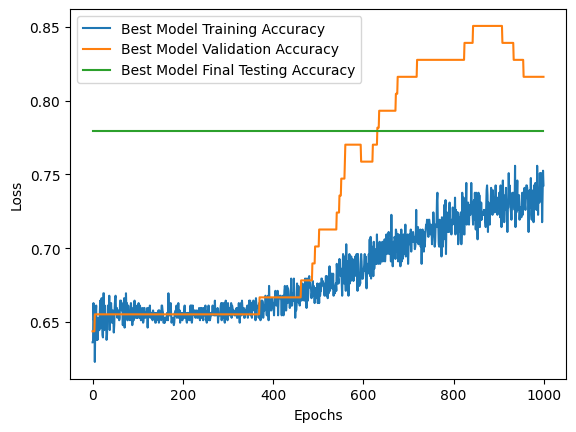

In [100]:
import matplotlib.pyplot as plt

epochs_range = range(epochs)

plt.plot(epochs_range, train_accuracy_list_with_dropouts_base_1, label='Best Model Training Accuracy')
plt.plot(epochs_range, val_accuracy_list_with_dropouts_base_1, label='Best Model Validation Accuracy')
plt.plot(epochs_range, [accuracy_dropouts_base_1]*epochs, label='Best Model Final Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

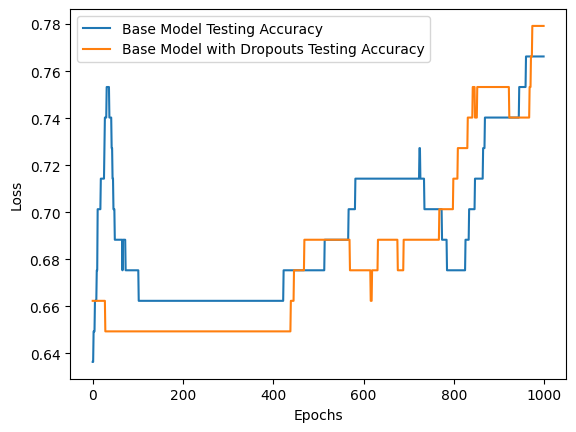

In [106]:
import matplotlib.pyplot as plt

epochs_range = range(epochs)

plt.plot(epochs_range, test_accuracy_list_optimizer_asgd_1, label='Base Model Testing Accuracy')
plt.plot(epochs_range, test_accuracy_list_with_dropouts_base_1, label='Base Model with Dropouts Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

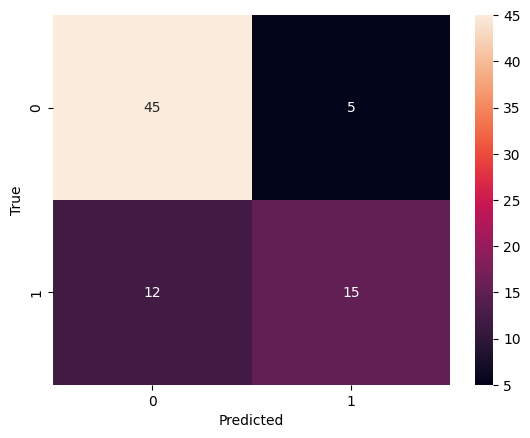

In [101]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_numpy, test_predictions_rounded_numpy_with_dropouts_base_1)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [102]:
!pip install torchmetrics

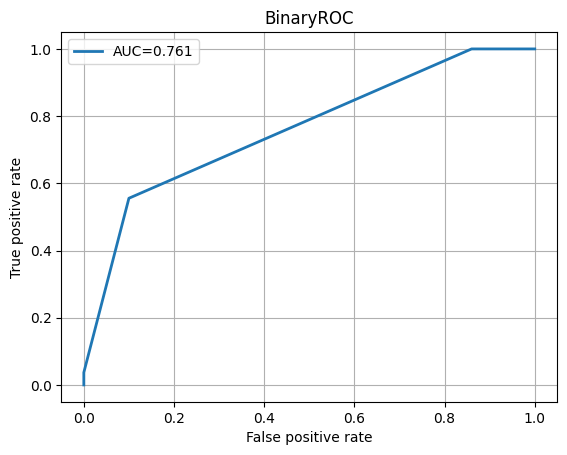

In [103]:
from torch import tensor
from torchmetrics.classification import BinaryROC

broc = BinaryROC(thresholds=5).to(device)
broc(test_predictions_with_dropouts_base_1, y_test_tensor.to(torch.int))
broc.update(test_predictions_with_dropouts_base_1, y_test_tensor.to(torch.int))
fig_, ax_ = broc.plot(score=True)

In [105]:
torch.save(model_with_dropouts_base_1.state_dict(), 'best_model_model.pt')

Adding Normalization in the Base Model

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

class BaseModelWithNoamalization(nn.Module):
    def __init__(self):
        super(BaseModelWithNoamalization, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [90]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_with_normalization_base_2 = BaseModelWithNoamalization().to(device)
summary(model_with_normalization_base_2, input_size=(32, 7))

learning_rate = 0.0001
epochs = 1000
batch_size = 10
loss_function = nn.BCELoss()
optimizer = optim.ASGD(model_with_normalization_base_2.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_with_normalization_base_2=[]
val_loss_list_with_normalization_base_2=[]
train_accuracy_list_with_normalization_base_2=[]
val_accuracy_list_with_normalization_base_2=[]
test_accuracy_list_with_normalization_base_2=[]

start_time = time.time()
for epoch in range(epochs):
    model_with_normalization_base_2.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_with_normalization_base_2(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_with_normalization_base_2.append(train_accuracy)
    train_loss_list_with_normalization_base_2.append(train_loss)

    model_with_normalization_base_2.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_with_normalization_base_2(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_with_normalization_base_2.append(val_accuracy)
    val_loss_list_with_normalization_base_2.append(val_loss)

    test_predictions_normalization_base_2 = model_with_normalization_base_2(X_test_tensor).view(-1)
    test_predictions_rounded_normalization_base_2 = torch.round(test_predictions_normalization_base_2)
    test_predictions_rounded_numpy_normalization_base_2 = test_predictions_rounded_normalization_base_2.cpu().detach().numpy()
    y_test_numpy = y_test_tensor.cpu().numpy()
    accuracy_normalization_base_2 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_normalization_base_2)
    test_accuracy_list_with_normalization_base_2.append(accuracy_normalization_base_2)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

Epoch 1/1000, Training Loss: 40.39201, Validation Loss: 5.86738
Epoch 2/1000, Training Loss: 40.23627, Validation Loss: 5.83498
Epoch 3/1000, Training Loss: 40.08461, Validation Loss: 5.80755
Epoch 4/1000, Training Loss: 39.93665, Validation Loss: 5.78067
Epoch 5/1000, Training Loss: 39.79234, Validation Loss: 5.75438
Epoch 6/1000, Training Loss: 39.65113, Validation Loss: 5.72864
Epoch 7/1000, Training Loss: 39.51314, Validation Loss: 5.70346
Epoch 8/1000, Training Loss: 39.37823, Validation Loss: 5.67874
Epoch 9/1000, Training Loss: 39.24557, Validation Loss: 5.65447
Epoch 10/1000, Training Loss: 39.11546, Validation Loss: 5.63065
Epoch 11/1000, Training Loss: 38.98810, Validation Loss: 5.60725
Epoch 12/1000, Training Loss: 38.86311, Validation Loss: 5.58425
Epoch 13/1000, Training Loss: 38.73931, Validation Loss: 5.56161
Epoch 14/1000, Training Loss: 38.60603, Validation Loss: 5.53882
Epoch 15/1000, Training Loss: 38.46314, Validation Loss: 5.51709
Epoch 16/1000, Training Loss: 38.3

In [91]:
from sklearn.metrics import accuracy_score

model_with_normalization_base_2.eval()
test_predictions_normalization_base_2 = model_with_normalization_base_2(X_test_tensor).view(-1)
test_predictions_rounded_normalization_base_2 = torch.round(test_predictions_normalization_base_2)

test_predictions_rounded_numpy_normalization_base_2 = test_predictions_rounded_normalization_base_2.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_normalization_base_2 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_normalization_base_2)

print(f"Accuracy for base model with normalization: {accuracy_normalization_base_2:.4f}")

Accuracy for base model with normalization: 0.7662


In [84]:
model_with_normalization_base_2.eval()
test_loss=0
with torch.no_grad():
    test_outputs_normalization_base_2 = model_with_normalization_base_2(X_test_tensor)
    test_loss_normalization_base_2 = loss_function(test_outputs_normalization_base_2, y_test_tensor.view(-1, 1))

print(f"Base Model with Normalization Test Loss: {test_loss_normalization_base_2.item():.5f}")


Base Model with Normalization Test Loss: 0.47139


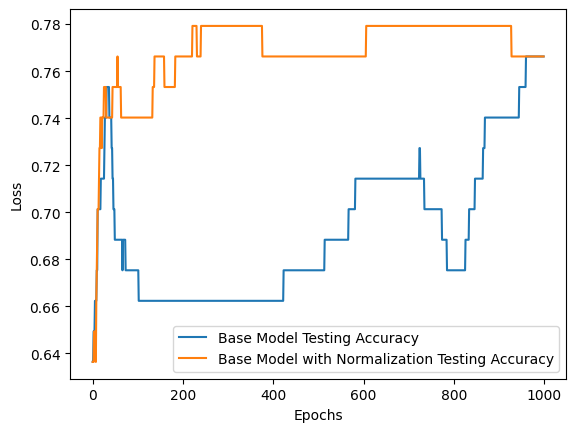

In [95]:
import matplotlib.pyplot as plt

epochs_range = range(epochs)

plt.plot(epochs_range, test_accuracy_list_optimizer_asgd_1, label='Base Model Testing Accuracy')
plt.plot(epochs_range, test_accuracy_list_with_normalization_base_2, label='Base Model with Normalization Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

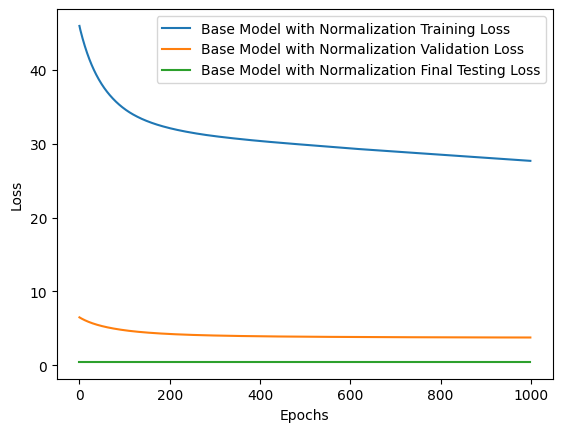

In [85]:
import matplotlib.pyplot as plt

epochs_range = range(epochs)

plt.plot(epochs_range, train_loss_list_with_normalization_base_2, label='Base Model with Normalization Training Loss')
plt.plot(epochs_range, val_loss_list_with_normalization_base_2, label='Base Model with Normalization Validation Loss')
plt.plot(epochs_range, [test_loss_normalization_base_2.cpu().item()]*epochs, label='Base Model with Normalization Final Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

Adding learning rate scheduler in Base Model

In [107]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

class BaseModelWithLRS(nn.Module):
    def __init__(self):
        super(BaseModelWithLRS, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [119]:
import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_with_lrs_base_3 = BaseModelWithLRS().to(device)
summary(model_with_lrs_base_3, input_size=(32, 7))

learning_rate = 0.0001
epochs = 1000
batch_size = 10
loss_function = nn.BCELoss()
optimizer = optim.ASGD(model_with_lrs_base_3.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_with_lrs_base_3=[]
val_loss_list_with_lrs_base_3=[]
train_accuracy_list_with_lrs_base_3=[]
val_accuracy_list_with_lrs_base_3=[]
test_accuracy_list_with_lrs_base_3=[]

start_time = time.time()
for epoch in range(epochs):
    model_with_lrs_base_3.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_with_lrs_base_3(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_with_lrs_base_3.append(train_accuracy)
    train_loss_list_with_lrs_base_3.append(train_loss)

    model_with_lrs_base_3.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_with_lrs_base_3(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_with_lrs_base_3.append(val_accuracy)
    val_loss_list_with_lrs_base_3.append(val_loss)

    test_predictions_lrs_base_3 = model_with_lrs_base_3(X_test_tensor).view(-1)
    test_predictions_rounded_lrs_base_3 = torch.round(test_predictions_lrs_base_3)
    test_predictions_rounded_numpy_lrs_base_3 = test_predictions_rounded_lrs_base_3.cpu().detach().numpy()
    y_test_numpy = y_test_tensor.cpu().numpy()
    accuracy_lrs_base_3 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_lrs_base_3)
    test_accuracy_list_with_lrs_base_3.append(accuracy_lrs_base_3)
    scheduler.step(val_loss)
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/1000, Training Loss: 40.95439, Validation Loss: 6.10323
Epoch 2/1000, Training Loss: 40.93694, Validation Loss: 6.10029
Epoch 3/1000, Training Loss: 40.91957, Validation Loss: 6.09736
Epoch 4/1000, Training Loss: 40.90229, Validation Loss: 6.09445
Epoch 5/1000, Training Loss: 40.88509, Validation Loss: 6.09155
Epoch 6/1000, Training Loss: 40.86797, Validation Loss: 6.08866
Epoch 7/1000, Training Loss: 40.85093, Validation Loss: 6.08578
Epoch 8/1000, Training Loss: 40.83394, Validation Loss: 6.08291
Epoch 9/1000, Training Loss: 40.81703, Validation Loss: 6.08006
Epoch 10/1000, Training Loss: 40.80020, Validation Loss: 6.07722
Epoch 11/1000, Training Loss: 40.78344, Validation Loss: 6.07439
Epoch 12/1000, Training Loss: 40.76676, Validation Loss: 6.07158
Epoch 13/1000, Training Loss: 40.75015, Validation Loss: 6.06877
Epoch 14/1000, Training Loss: 40.73362, Validation Loss: 6.06598
Epoch 15/1000, Training Loss: 40.71716, Validation Loss: 6.06320
Epoch 16/1000, Training Loss: 40.7

In [120]:
from sklearn.metrics import accuracy_score

model_with_lrs_base_3.eval()
test_predictions_lrs_base_3 = model_with_lrs_base_3(X_test_tensor).view(-1)
test_predictions_rounded_lrs_base_3 = torch.round(test_predictions_lrs_base_3)

test_predictions_rounded_numpy_lrs_base_3 = test_predictions_rounded_lrs_base_3.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_lrs_base_3 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_lrs_base_3)

print(f"Accuracy for base model with LRS: {accuracy_lrs_base_3:.4f}")

Accuracy for base model with LRS: 0.7792


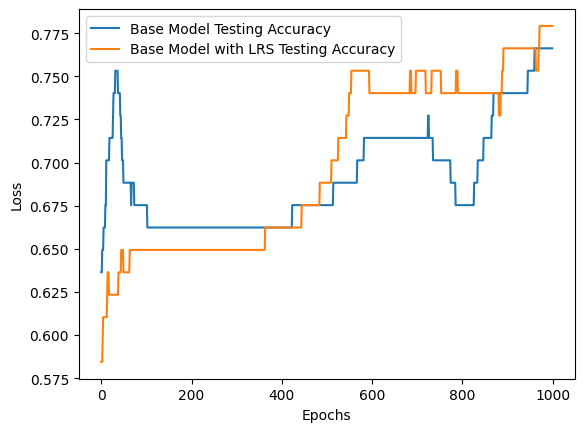

In [121]:
import matplotlib.pyplot as plt

epochs_range = range(epochs)

plt.plot(epochs_range, test_accuracy_list_optimizer_asgd_1, label='Base Model Testing Accuracy')
plt.plot(epochs_range, test_accuracy_list_with_lrs_base_3, label='Base Model with LRS Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

Adding Early Stopping in Base Model

In [123]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import torch.optim as optim

class BaseModelWithEarlyStopping(nn.Module):
    def __init__(self):
        super(BaseModelWithEarlyStopping, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [128]:
def should_we_stop_training(val_diff_list):
  if val_diff_list[-1]<=.002:
    return True
  return False

import time
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_with_early_stop_base_4 = BaseModelWithEarlyStopping().to(device)
summary(model_with_early_stop_base_4, input_size=(32, 7))

learning_rate = 0.0001
epochs = 1000
batch_size = 10
loss_function = nn.BCELoss()
optimizer = optim.ASGD(model_with_early_stop_base_4.parameters(), lr=learning_rate)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_dataset = TensorDataset(X_train_validate_tensor, y_train_validate_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

train_loss_list_with_early_stop_base_4=[]
val_loss_list_with_early_stop_base_4=[]
train_accuracy_list_with_early_stop_base_4=[]
val_accuracy_list_with_early_stop_base_4=[]
test_accuracy_list_with_early_stop_base_4=[]

last_val_loss=0
val_diff_list=[]

start_time = time.time()
for epoch in range(epochs):
    model_with_early_stop_base_4.train()
    train_loss = 0.0
    train_epoch_predictions = []
    train_epoch_actuals = []

    for inputs, labels in train_loader:
        outputs = model_with_early_stop_base_4(inputs)
        train_binary_outputs = torch.round(outputs).cpu().detach().numpy()
        train_actuals = labels.cpu().numpy()
        train_epoch_predictions.extend(train_binary_outputs)
        train_epoch_actuals.extend(train_actuals)
        loss = loss_function(outputs, labels.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_accuracy = accuracy_score(train_epoch_actuals, train_epoch_predictions)
    train_accuracy_list_with_early_stop_base_4.append(train_accuracy)
    train_loss_list_with_early_stop_base_4.append(train_loss)

    model_with_early_stop_base_4.eval()
    val_loss = 0.0
    val_epoch_predictions = []
    val_epoch_actuals = []
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model_with_early_stop_base_4(val_inputs)
            val_binary_outputs = torch.round(val_outputs).cpu().detach().numpy()
            val_actuals = val_labels.cpu().numpy()
            val_epoch_predictions.extend(val_binary_outputs)
            val_epoch_actuals.extend(val_actuals)
            loss = loss_function(val_outputs, val_labels.view(-1, 1))
            val_loss += loss.item()
    val_accuracy = accuracy_score(val_epoch_actuals, val_epoch_predictions)
    val_accuracy_list_with_early_stop_base_4.append(val_accuracy)
    val_loss_list_with_early_stop_base_4.append(val_loss)

    val_diff_list.append(abs(val_loss-last_val_loss))
    last_val_loss=val_loss
    print("val diff is: ", val_diff_list[-1])

    test_predictions_early_stop_base_4 = model_with_early_stop_base_4(X_test_tensor).view(-1)
    test_predictions_rounded_early_stop_base_4 = torch.round(test_predictions_early_stop_base_4)
    test_predictions_rounded_numpy_early_stop_base_4 = test_predictions_rounded_early_stop_base_4.cpu().detach().numpy()
    y_test_numpy = y_test_tensor.cpu().numpy()
    accuracy_early_stop_base_4 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_early_stop_base_4)
    test_accuracy_list_with_early_stop_base_4.append(accuracy_early_stop_base_4)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}".format())
    if should_we_stop_training(val_diff_list):
        break
end_time = time.time()

print(f"Training took: {end_time - start_time:.2f} seconds")

val diff is:  6.281123220920563
Epoch 1/1000, Training Loss: 42.46593, Validation Loss: 6.28112
val diff is:  0.005314290523529053
Epoch 2/1000, Training Loss: 42.43246, Validation Loss: 6.27581
val diff is:  0.0052874088287353516
Epoch 3/1000, Training Loss: 42.39920, Validation Loss: 6.27052
val diff is:  0.005263268947601318
Epoch 4/1000, Training Loss: 42.36610, Validation Loss: 6.26526
val diff is:  0.005235254764556885
Epoch 5/1000, Training Loss: 42.33318, Validation Loss: 6.26002
val diff is:  0.005209088325500488
Epoch 6/1000, Training Loss: 42.30043, Validation Loss: 6.25481
val diff is:  0.005187511444091797
Epoch 7/1000, Training Loss: 42.26784, Validation Loss: 6.24963
val diff is:  0.005163908004760742
Epoch 8/1000, Training Loss: 42.23541, Validation Loss: 6.24446
val diff is:  0.005144238471984863
Epoch 9/1000, Training Loss: 42.20313, Validation Loss: 6.23932
val diff is:  0.0051223039627075195
Epoch 10/1000, Training Loss: 42.17098, Validation Loss: 6.23420
val diff i

In [129]:
from sklearn.metrics import accuracy_score

model_with_early_stop_base_4.eval()
test_predictions_early_stop_base_4 = model_with_early_stop_base_4(X_test_tensor).view(-1)
test_predictions_rounded_early_stop_base_4 = torch.round(test_predictions_early_stop_base_4)

test_predictions_rounded_numpy_early_stop_base_4 = test_predictions_rounded_early_stop_base_4.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().numpy()

accuracy_early_stop_base_4 = accuracy_score(y_test_numpy, test_predictions_rounded_numpy_early_stop_base_4)

print(f"Accuracy for base model with Early Stopping: {accuracy_early_stop_base_4:.4f}")

Accuracy for base model with Early Stopping: 0.7792


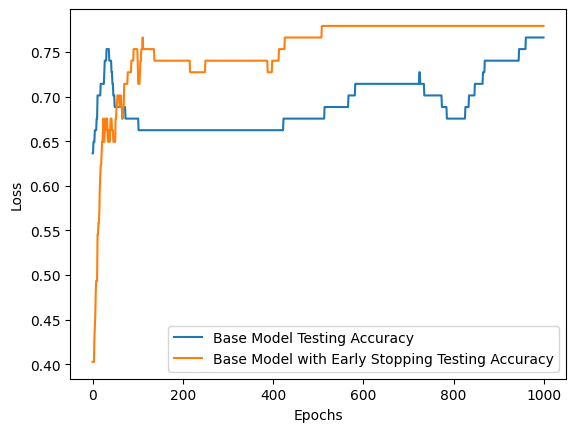

In [131]:
import matplotlib.pyplot as plt

epochs_range = range(epochs)
while len(test_accuracy_list_with_early_stop_base_4) < len(epochs_range):
    test_accuracy_list_with_early_stop_base_4.append(test_accuracy_list_with_early_stop_base_4[-1])

plt.plot(epochs_range, test_accuracy_list_optimizer_asgd_1, label='Base Model Testing Accuracy')
plt.plot(epochs_range, test_accuracy_list_with_early_stop_base_4, label='Base Model with Early Stopping Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()